Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [29]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-04-10 00:46:47--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-04-10 00:46:47--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv.1’

Mall_Customers.csv. 100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-10 00:46:48 (50.5 MB/s)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [31]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [32]:
data.isna().sum()

data = data.dropna()

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [34]:
print(data.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


cada variable proporciona un conjunto de datos que sirve para el cluster ya que con estos datos podemos hacer un conjunto de personas que comparten casi los mismos datos asì arman grupos em el caso de estos datos El ingreso anual aproximado del cliente.

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [35]:

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



In [ ]:
los datos son esencialas antes de aplicar el algoritmo K-means ya que se utiliza  para clasificar . Esto puede llegar a distorsionar la formación de los clústeres, ya que las características entre mas valores  influirán más en la distancia calculada entre los puntos, dando lugar a agrupamientos incorrectos ajusta las características para que tengan escalas similares, ya sea mediante la normalización Min-Max o la estandarización ).

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


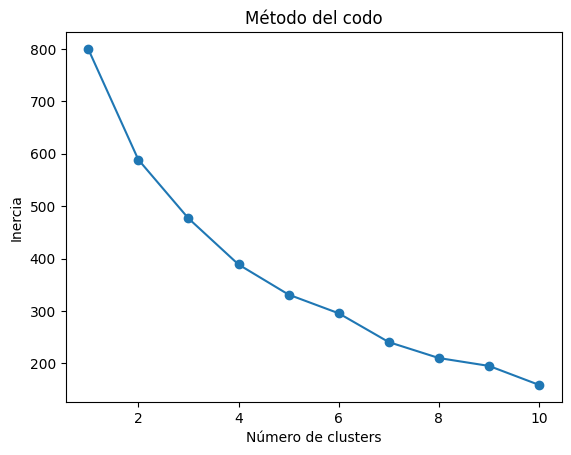

In [36]:

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

en el punto numero 5 el codo empieza a desender eso significa que significa que por mas que aumnete los cluster no va a aumentar el numero de ganancia en la base de datos

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [38]:

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_scaled)
data['cluster'] = kmeans.labels_


In [40]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,19,15,39,4
1,2,0,21,15,81,4
2,3,1,20,16,6,2
3,4,1,23,16,77,1
4,5,1,31,17,40,1


In [45]:
data.groupby('cluster').size()

,0
cluster,
0,28
1,57
2,55
3,19
4,41


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

hay  5 cluster la cual estan dividivos en rango de edada en: 28 años, 57 años, 55 años, 19 años y 41 años

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [41]:

cluster_analysis = data.groupby('cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
})

cluster_analysis


,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,57.214286,46.785714,38.714286
1,28.438596,59.666667,67.684211
2,48.109091,58.818182,34.781818
3,38.473684,85.894737,14.210526
4,28.536585,61.804878,71.097561


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



In [ ]:
 proporciona la edad promedio, el ingreso anual promedio y el puntaje de gasto promedio para cada cluster. Al observar estas estadísticas para cada cluster, podemos identificar las características distintivas de cada grupo:

Cluster 0:Posiblemente un grupo de personas jóvenes con ingresos medios-bajos y un puntaje de gasto medio.
Cluster 1:Posiblemente un grupo de personas con ingresos altos y un alto puntaje de gasto.
Cluster 2:Posiblemente un grupo de personas de edad media con un ingreso medio y un puntaje de gasto bajo.
Cluster 3:Posiblemente un grupo de personas con ingresos medios y un puntaje de gasto bajo.
Cluster 4:Posiblemente un grupo de personas de mediana edad con ingresos altos y un puntaje de gasto bajo.




Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

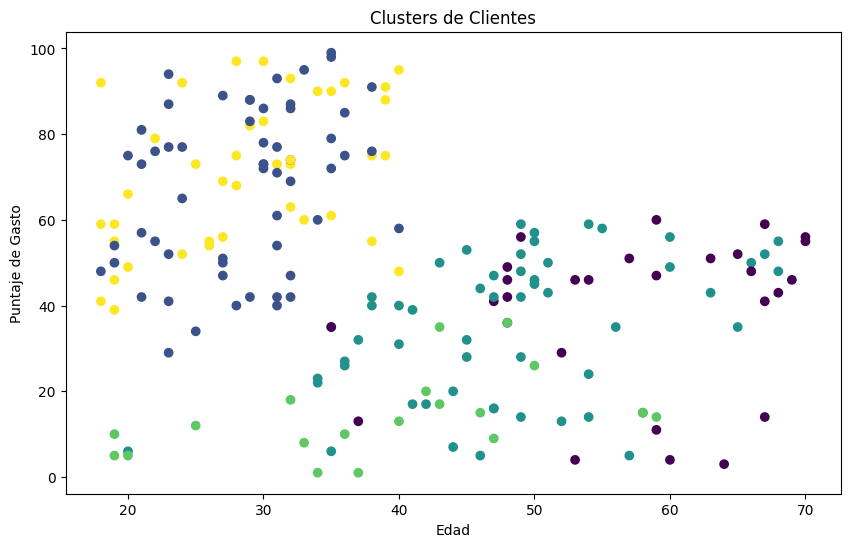

In [42]:

plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['cluster'], cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto')
plt.title('Clusters de Clientes')
plt.show()


Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

In [ ]:
 La gráfica muestra los clientes en un espacio bidimensional definido por la edad y el puntaje de gasto. Se pueden observar algunos patrones visuales:

1. Los clusters no están perfectamente separados.
2. Se observan algunos grupos con mayor densidad, lo que sugiere una agrupación más clara de clientes con características similares en términos de edad y puntaje de gasto.
3. Hay clientes más jóvenes con puntajes de gasto más altos (mayor concentración en la parte superior izquierda).
4. También se observa un grupo con mayor edad y puntaje de gasto más bajo (en la parte inferior derecha).



Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [ ]:

Basándome en el análisis descriptivo proporcionado por el código, propondría los siguientes nombres para cada cluster:

Cluster 0: Jóvenes Gastadores Moderados:Este grupo parece estar compuesto por personas relativamente jóvenes con ingresos medios-bajos y un puntaje de gasto promedio.No son grandes gastadores, pero tampoco ahorradores extremos.

Cluster 1:  Adultos de Altos Ingresos y Gasto:Este cluster se caracteriza por altos ingresos y un alto puntaje de gasto, sugiriendo un grupo con gran poder adquisitivo y una inclinación a gastar libremente.

Cluster 2:  Maduros Conservadores:Este grupo probablemente está formado por personas de mediana edad con ingresos medios y un bajo puntaje de gasto.  Parecen ser más ahorrativos y menos propensos a realizar compras impulsivas.

Cluster 3:  Adultos de Ingresos Medios y Bajo Gasto:Similar al Cluster 2, pero posiblemente con una edad promedio ligeramente menor.  Se trata de personas con ingresos medios pero con una tendencia a gastar poco.

Cluster 4:  Maduros de Altos Ingresos y Bajo Gasto:Este cluster agrupa a personas de mayor edad con altos ingresos pero un bajo puntaje de gasto.  Probablemente priorizan la seguridad financiera y la inversión sobre el consumo.
